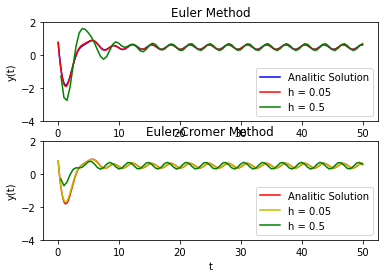

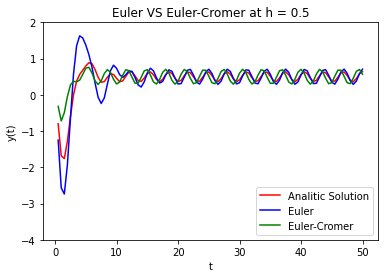

In [1]:
from solver import *
from math import *
import matplotlib.pyplot as plt
from euler_method import *

def Func(t, y, dy):
    return (-1 * y) + (-1 * dy) + sin(t)**2

def exact(t):
    return ((5/13) * exp(-0.5 * t) * cos(0.5 * sqrt(3) * t) ) - (108/(13 * sqrt(3)) * exp(-0.5*t) * sin(0.5 * sqrt(3) * t) ) + 0.5 + ((3/26) * cos(2*t)) - ((1/13) * sin(2*t))

def analitic_solution(params):
    t0 = params['t0']
    t_end = params['t_end']
    h = params['h']
    step = int((t_end - t0) / h)
    t = []
    res_exact = []
    for i in range(step):
        tm = (i + 1) * h
        y_next = exact(tm)
        res_exact.append(y_next)
        t.append(tm)
    return (t, res_exact)

paramsA = {
    't0' : 0,
    "t_end" : 50,
    "h" : 5 * 10**-2,
    "y0" : 1,
    "dy0" : -9/2
}

paramsB = {
    't0' : 0,
    "t_end" : 50,
    "h" : 5 * 10**-1,
    "y0" : 1,
    "dy0" : -9/2
}

res_exact = []
res_euler = []
res_euler_2 = []
res_eulercromer = []
res_eulercromer_2 = []
t = []

plt.subplot(2, 1, 1)

#Plot Euler
(t, res_exact) = analitic_solution(paramsA)
plt.plot(t, res_exact, color = 'b', label =  'Analitic Solution')

(t, res_euler) = cauchy_euler(paramsA, Func)
plt.plot(t, res_euler, color = 'r', label = 'h = 0.05')

(t, res_euler_2) = cauchy_euler(paramsB, Func)
plt.plot(t, res_euler_2, color = 'g', label = 'h = 0.5')
plt.title('Euler Method')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.ylim(-4,2)
plt.legend()

plt.subplot(2, 1, 2)

(t, res_exact) = analitic_solution(paramsA)
plt.plot(t, res_exact, color = 'r', label = 'Analitic Solution')

(t, res_eulercromer) = cauchy_eulercromer(paramsA, Func)
plt.plot(t, res_eulercromer, color = 'y', label = 'h = 0.05')

(t, res_eulercromer_2) = cauchy_eulercromer(paramsB, Func)
plt.plot(t, res_eulercromer_2, color = 'g', label = 'h = 0.5')
plt.title('Euler-Cromer Method')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.ylim(-4,2)
plt.legend()

plt.figure()

(t, res_exact) = analitic_solution(paramsB)
plt.plot(t, res_exact, color = 'r', label  = 'Analitic Solution')

(t, res_euler_2) = cauchy_euler(paramsB, Func)
plt.plot(t, res_euler_2, color = 'b', label = 'Euler')


(t, res_eulercromer_2) = cauchy_eulercromer(paramsB, Func)
plt.plot(t, res_eulercromer_2, color ='g', label = 'Euler-Cromer')
plt.title('Euler VS Euler-Cromer at h = 0.5')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.ylim(-4,2)
plt.legend()

plt.show()